## Abstract

This ipynb analyzes consumer complaints submitted about JPMorgan Chase to the Consumer Financial Protection Bureau (CFPB) from 2011 to 2025. Using 150,000 complaints, I explore trends in complaint volume, identify the products and issues that generate the most dissatisfaction, examine state-level complaint concentration, and evaluate the company’s responsiveness and resolution outcomes. The analysis uses Python (pandas) for data cleaning and aggregation and seaborn/matplotlib for visualization. 

## Setting up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df = pd.read_csv("jp_complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,8/5/2015,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,ME,4074,NaN,NaN,Referral,8/12/2015,Closed with explanation,Yes,No,1503950
1,09/29/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,OH,44512,NaN,NaN,Referral,10/3/2014,Closed with explanation,Yes,No,1049885
2,11/8/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,TX,77065,NaN,NaN,Web,11/12/2013,Closed with explanation,Yes,No,590810
3,07/27/20,Mortgage,FHA mortgage,Trouble during payment process,NaN,i have been back and forth with chase about fr...,GA,XXXXX,"Older American, Servicemember",Consent provided,Web,07/28/20,Closed with explanation,Yes,NaN,3766529
4,12/28/21,Checking or savings account,Other banking product or service,Managing an account,Funds not handled or disbursed as instructed,In XX/XX/XXXX2021 I was paying my property tax...,CA,928XX,NaN,Consent provided,Web,12/28/21,Closed with non-monetary relief,Yes,NaN,5048265


### Preview data

In [3]:
print(f"Total records: {len(df):,}")
print("\nFirst 5 rows:")
print(df.head())

Total records: 149,956

First 5 rows:
  Date received                      Product  \
0      8/5/2015                     Mortgage   
1      09/29/14                     Mortgage   
2     11/8/2013      Bank account or service   
3      07/27/20                     Mortgage   
4      12/28/21  Checking or savings account   

                        Sub-product                                     Issue  \
0                    Other mortgage  Loan servicing, payments, escrow account   
1                    Other mortgage  Loan modification,collection,foreclosure   
2                  Checking account   Account opening, closing, or management   
3                      FHA mortgage            Trouble during payment process   
4  Other banking product or service                       Managing an account   

                                      Sub-issue  \
0                                           NaN   
1                                           NaN   
2                                

## Analysis 

### Data Cleaning

In [4]:
# Convert "Date received" to datetime
df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')

# Drop rows where the date couldn't be parsed
df = df.dropna(subset=['Date received'])

# Create time-based features
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month
df['YearMonth'] = df['Date received'].dt.to_period('M').astype(str)

print(df[['Date received', 'Year', 'Month', 'YearMonth']].head())

   Date received  Year  Month YearMonth
0     2015-08-05  2015      8   2015-08
2     2013-11-08  2013     11   2013-11
6     2025-06-03  2025      6   2025-06
11    2019-05-08  2019      5   2019-05
15    2023-12-08  2023     12   2023-12


### Total Complaint Volume Over Time

In [5]:
# Total complaints
total_complaints = len(df)
print(f"\nTotal complaints: {total_complaints:,} \n")

# Annual complaint volume
complaints_per_year = df.groupby('Year').size().reset_index(name='count')
print(complaints_per_year)

# Highest complaint year
highest_year = complaints_per_year.loc[complaints_per_year['count'].idxmax()]
print(f"\nYear with highest complaints: {highest_year['Year']} ({highest_year['count']:,} complaints)")



Total complaints: 59,393 

    Year  count
0   2011    185
1   2012   2775
2   2013   3210
3   2014   3045
4   2015   3173
5   2016   3422
6   2017   3314
7   2018   3671
8   2019   3314
9   2020   3590
10  2021   4272
11  2022   4760
12  2023   6199
13  2024   7572
14  2025   6891

Year with highest complaints: 2024 (7,572 complaints)


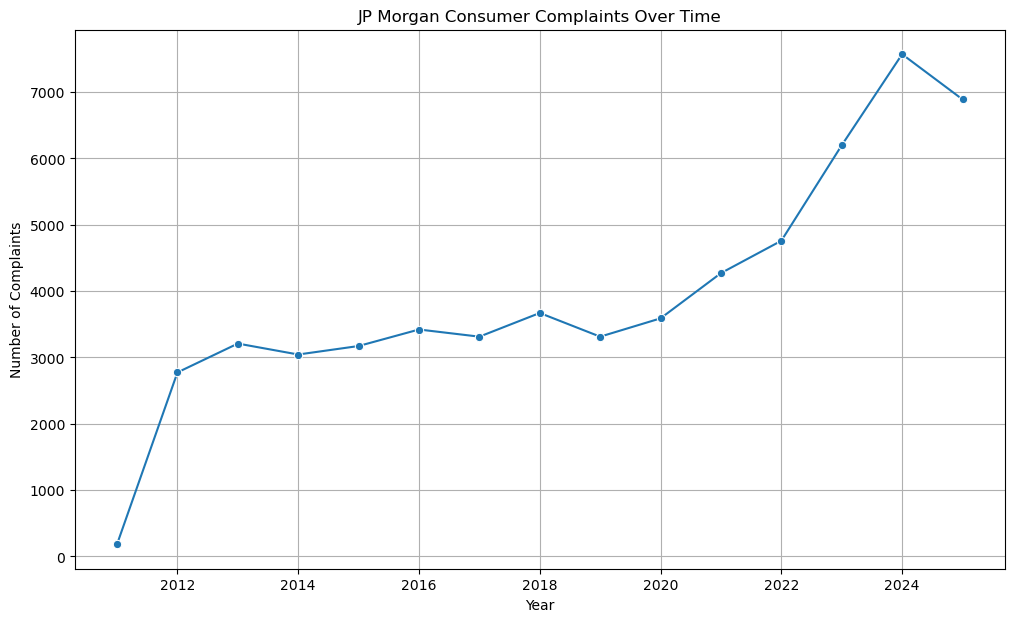

In [7]:
# Plotting the annual complaint volume
complaints_per_year = df.groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 7))
sns.lineplot(data=complaints_per_year, x='Year', y='Count', marker='o')
plt.title('JP Morgan Consumer Complaints Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()



### Biggest drivers (Product and Sub-issue)

In [8]:
# Complaints by product
product_counts = df['Product'].value_counts().reset_index()
print(product_counts)

                                              Product  count
0                         Checking or savings account  15287
1                                            Mortgage   9928
2                                         Credit card   8632
3                         Credit card or prepaid card   7361
4                             Bank account or service   3837
5   Credit reporting, credit repair services, or o...   3577
6   Credit reporting or other personal consumer re...   3499
7   Money transfer, virtual currency, or money ser...   2849
8                                     Debt collection   2399
9                               Vehicle loan or lease    882
10                                      Consumer Loan    427
11                                       Student loan    339
12                                    Money transfers     97
13          Payday loan, title loan, or personal loan     91
14                                   Credit reporting     80
15                      

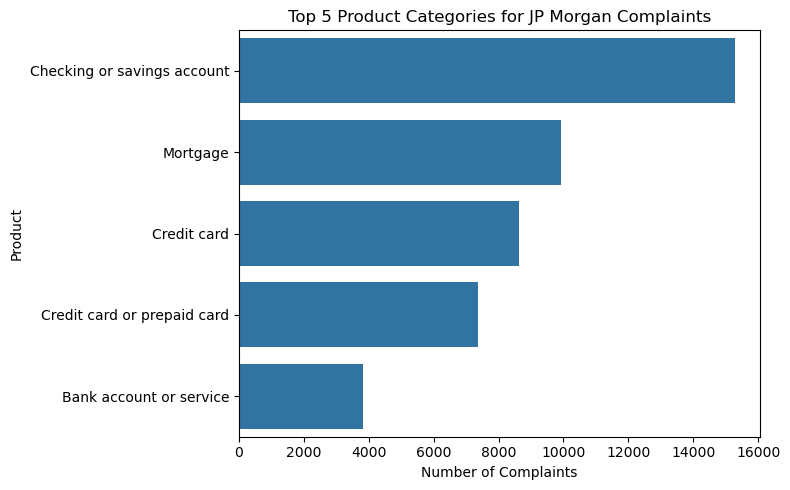

In [11]:
# Visualization for top products
product_counts.columns = ['Product', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(data=product_counts.head(5), x='Count', y='Product')
plt.title('Top 5 Product Categories for JP Morgan Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [12]:
# Top sub-issues (filtering out NaN values)
print("\nTop 10 Sub-issues by Complaint Volume:")
top_subissues = df['Sub-issue'].value_counts(dropna=True).head(10)
print(top_subissues)


Top 10 Sub-issues by Complaint Volume:
Sub-issue
Deposits and withdrawals                                                            3535
Credit card company isn't resolving a dispute about a purchase on your statement    3007
Company closed your account                                                         2198
Problem using a debit or ATM card                                                   1993
Transaction was not authorized                                                      1535
Credit inquiries on your report that you don't recognize                            1519
Information belongs to someone else                                                 1490
Reporting company used your report improperly                                       1280
Card was charged for something you did not purchase with the card                   1032
Funds not handled or disbursed as instructed                                        1019
Name: count, dtype: int64


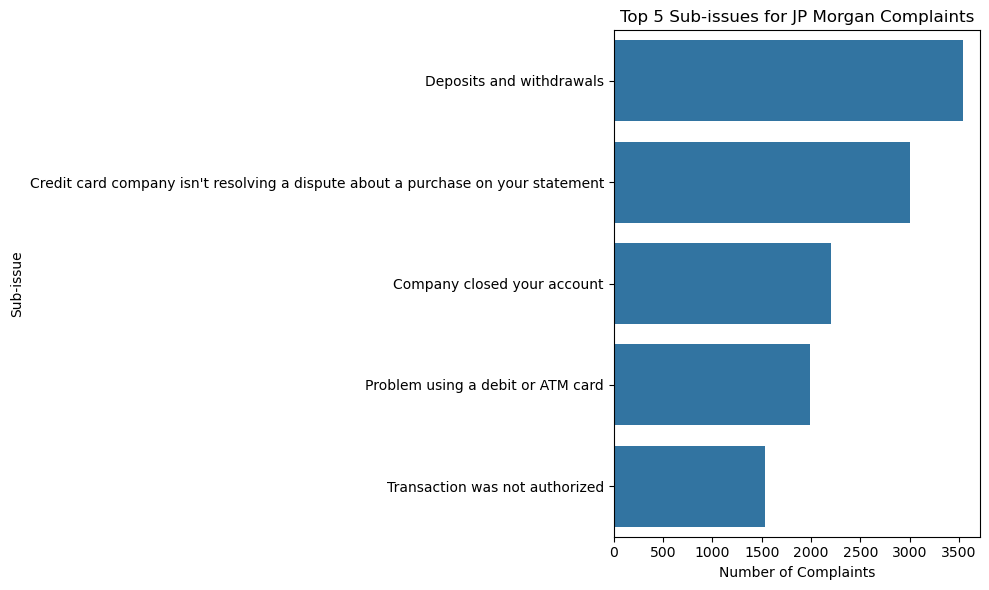

In [13]:
# Visualization for top sub-issues
plt.figure(figsize=(10, 6))
top_subissues_df = top_subissues.reset_index().head(5)
top_subissues_df.columns = ['Sub-issue', 'Count']
sns.barplot(data=top_subissues_df, x='Count', y='Sub-issue')
plt.title('Top 5 Sub-issues for JP Morgan Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub-issue')
plt.tight_layout()
plt.show()

### State Concentration

In [14]:
# Top states by complaint volume
state_complaints = df['State'].value_counts()
print(f"Total states with complaints: {len(state_complaints)} \n")

print("Top 10 States by Complaint Volume:")
top_states = df['State'].value_counts().head(10)
top_states.columns = ['State', 'Count']
print(top_states)


Total states with complaints: 63 

Top 10 States by Complaint Volume:
State
CA    10261
NY     6648
FL     5523
TX     5024
IL     3300
NJ     2379
GA     2216
OH     1697
MI     1587
AZ     1545
Name: count, dtype: int64


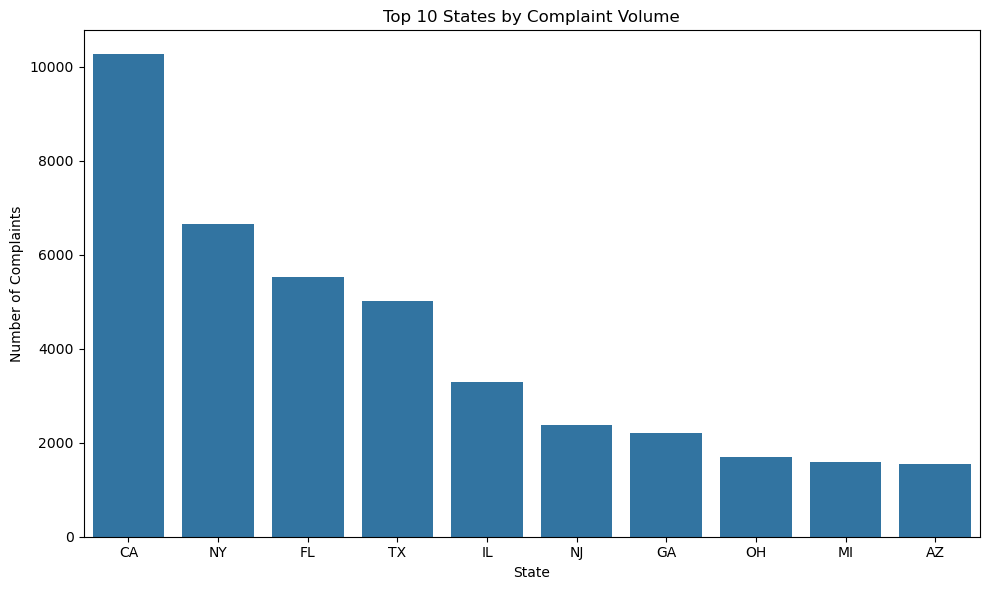

In [17]:
# Visualization for states
state_counts = state_complaints.reset_index()
state_counts.columns = ['State', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=state_counts.head(10), x='State', y='count')
plt.title("Top 10 States by Complaint Volume")
plt.xlabel("State")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


In [ ]:
# Heatmap
#!pip install plotly

import plotly.express as px

fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Blues',
    scope='usa',
    title='JP Morgan Consumer Complaints by State'
)
fig.show()

### Response & Resolution

In [18]:
response_counts = df['Company response to consumer'].value_counts().reset_index()
response_counts.columns = ['Company response', 'Count']

print(response_counts)


                  Company response  Count
0          Closed with explanation  46746
1      Closed with monetary relief   6311
2  Closed with non-monetary relief   4716
3            Closed without relief    919
4               Closed with relief    364
5                           Closed    233
6                      In progress    102
7                Untimely response      2


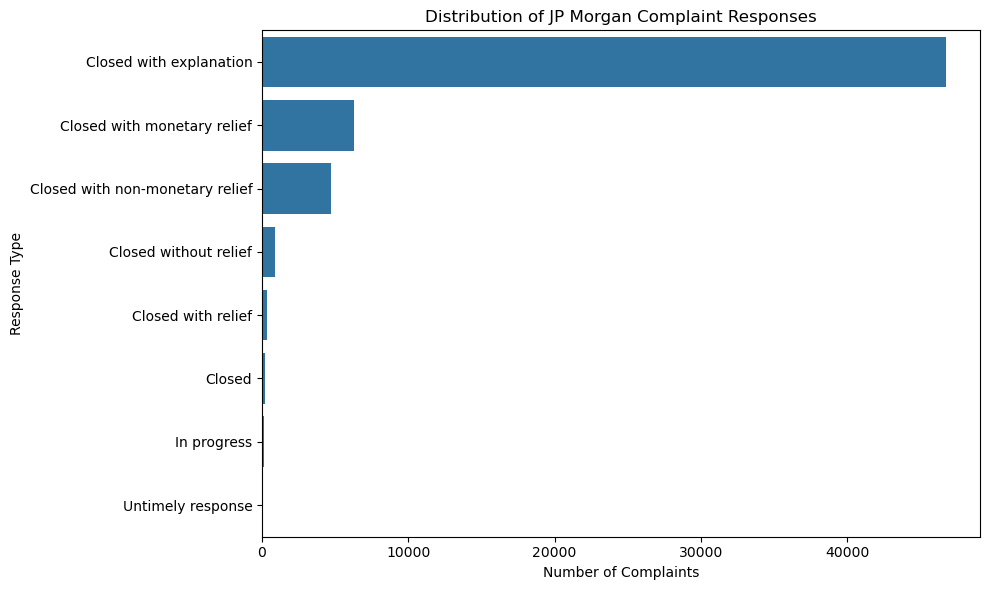

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=response_counts, x='Count', y='Company response')
plt.title("Distribution of JP Morgan Complaint Responses")
plt.xlabel("Number of Complaints")
plt.ylabel("Response Type")
plt.tight_layout()
plt.show()


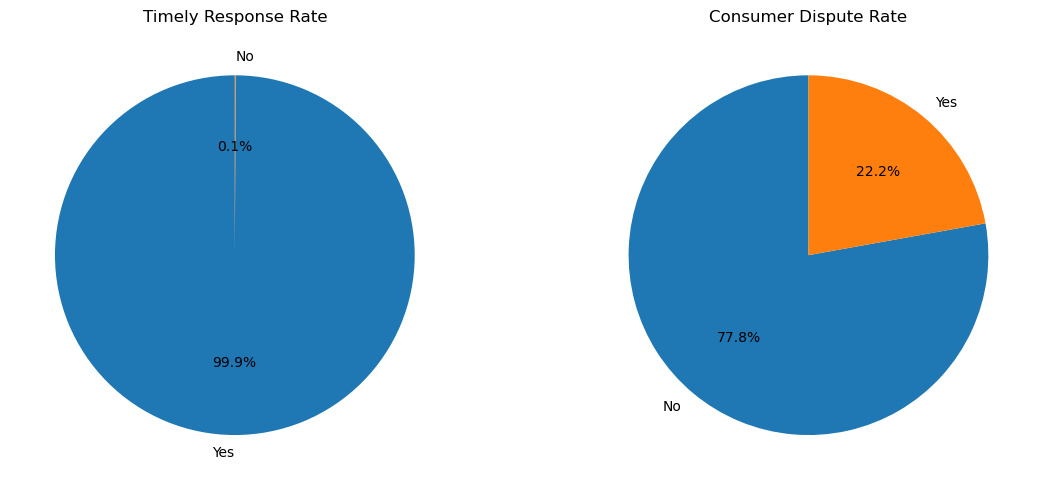

In [20]:
# Compute rates
timely_rate = df['Timely response?'].value_counts(normalize=True) * 100
dispute_rate = df['Consumer disputed?'].value_counts(normalize=True) * 100

# Plot side-by-side pie charts
plt.figure(figsize=(12, 5))

# --- Pie Chart 1: Timely Response ---
plt.subplot(1, 2, 1)
timely_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Timely Response Rate")
plt.ylabel("")

# --- Pie Chart 2: Dispute Rate ---
plt.subplot(1, 2, 2)
dispute_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Consumer Dispute Rate")
plt.ylabel("")

plt.tight_layout()
plt.show()


### Most Common Submission Channels

In [ ]:
submit_counts = df['Submitted via'].value_counts().reset_index()
submit_counts.columns = ['Submitted via', 'Count']
print(submit_counts)

  Submitted via  Count
0           Web  44177
1      Referral   9166
2         Phone   3996
3   Postal mail   1570
4           Fax    451
5  Web Referral     21
6         Email     12


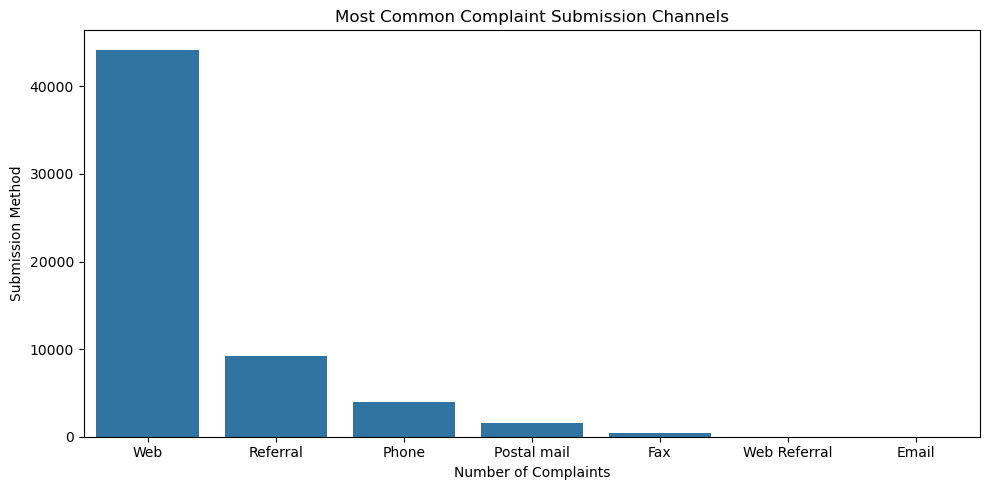

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=submit_counts, x='Submitted via', y='Count')
plt.title('Most Common Complaint Submission Channels')
plt.xlabel('Number of Complaints')
plt.ylabel('Submission Method')
plt.tight_layout()
plt.show()


## Findings

Findings show that complaint volume has grown over time. Complaints are heavily concentrated in checking and savings accounts, credit cards, and mortgages, while sub-issues such as deposit/withdrawal problems, unresolved credit card disputes, and account closures drive the largest volumes. Although JPMorgan responds timely to most complaints, many customers still dispute the company’s resolution, and most cases are closed with an explanation rather than monetary or non-monetary relief.